In [367]:
#Importing Libraies
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
% matplotlib inline 
import seaborn as sb

In [98]:
#Reading Datasets
df1 = pd.read_csv('train.csv')
df2= pd.read_csv('test.csv')
df3=pd.read_csv('gender_submission.csv')

In [401]:
df2.shape[0],df3.shape[0]

(418, 418)

In [402]:
#Checking for the df2 PasesengeId to df3 PassengerId for Joining Datasets
sum(df2['PassengerId']==df3['PassengerId']) 

418

 df3 and df2 contains same PassengerId.We want Survived column for df2 which is in df3 therefore Joining table on 
 'PassengerID '.

In [403]:
#Joining
new=pd.merge(df2,df3,on='PassengerId',how="outer")

In [404]:
#Check joining
new.shape[0]

418

In [102]:
new.sample()

,,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
P,386,24.0,NaN,S,7.775,"Aronsson, Mr. Ernst Axel Algot",0.0,1278,3.0,male,0.0,NaN,349911


Since we now have Survived column in new dataframe now Merging two dataset.

In [115]:
#Joining
df=pd.merge(df1,new,how="outer")

## Investigation & Wrangling of Dataset

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


In [119]:
df.shape[0]

1309

In [117]:
#Since all passengers it have no duplicated passengerId
df.PassengerId.nunique()

1309

In [120]:
df.Age.mean()

29.881137667304014

In [122]:
#Since Age is missing we can fill age with mean value of age
df.Age.isnull().any()
sum(df.Age.isnull())
##Filling then age
mean=df.Age.mean()
df['Age'].fillna(mean,inplace=True)

In [143]:
df.Survived=df.Survived.astype(int)
df.Age=df.Age.astype(int)
df.SibSp=df.SibSp.astype(int)
df.Parch=df.Parch.astype(int)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null int32
SibSp          1309 non-null int32
Parch          1309 non-null int32
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(1), int32(3), int64(3), object(5)
memory usage: 117.6+ KB


In [125]:
#checking min and min age 
df.Age.min(),df.Age.max()

(0, 80)

In [408]:
sum(df.Ticket.value_counts())

1309

## Analysis

Count of Survival and death?

In [413]:
sum(df['Survived'] == 1),sum(df['Survived'] == 0)

(494, 815)

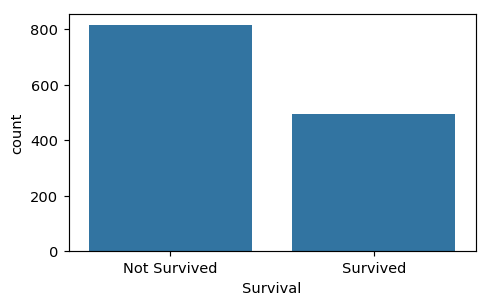

In [411]:
plt.figure(figsize=(5,3),dpi=105)
base_color=sb.color_palette()[0]
ax=sb.countplot(data=df,x='Survived',color=base_color);
plt.xlabel('Survival');
ax.set(xticklabels=['Not Survived','Survived']);

In [128]:
#Percentage of Survived an dead
df['Survived'].value_counts() * 100 / len(df) 

0    62.261268
1    37.738732
Name: Survived, dtype: float64

- It is clearly seen in Barchart that Survived ratio of Passenger is less then that of Dead ones.
- 62.26% of the Passenger were dead and 37.73% Passenger Survived.
- Talking about no's out of 1309, 494 Passengers Survived and 815 were dead.

Counts based on Sex?

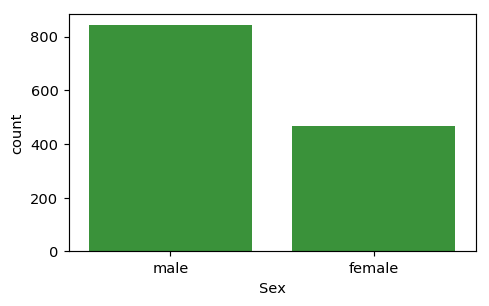

In [129]:
#Counts of Passengers according to Sex i.e males and Females.
plt.figure(figsize=(5,3),dpi=105)
base_color=sb.color_palette()[2]
sb.countplot(data=df,x='Sex',color=base_color);

Barchart Shows that there more Males then females.

Counts based on Class?(Who was more upper class peoples or Middle clas or Lower)

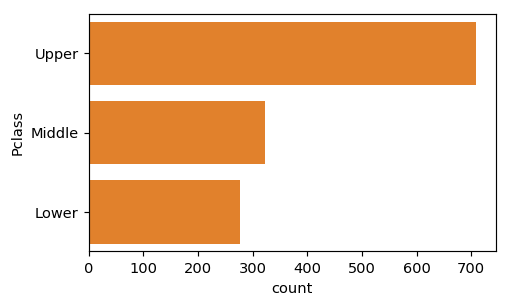

In [22]:
plt.figure(figsize=(5,3),dpi=105)
base_color=sb.color_palette()[1]
color_order=df['Pclass'].value_counts().index
ax=sb.countplot(data=df,y='Pclass',color=base_color,order=color_order)
ax.set(yticklabels=['Upper','Middle','Lower']);

Most Passenger's were of UpperClass and very less passengers were in Lower Class

Which age group survived the most and which group did not survived the most?

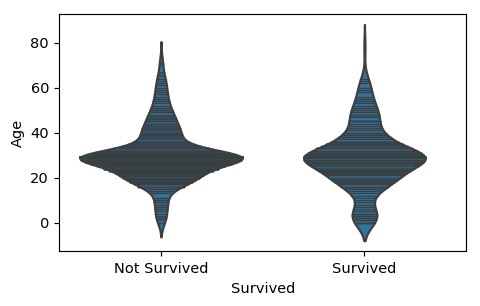

In [435]:
plt.figure(figsize=(5,3),dpi=105)
ax=sb.violinplot(data=df,x='Survived',y='Age',color=base_color,inner='stick');
ax.set(xticklabels=['Not Survived','Survived']);

Violin plot shows that the age groups betwen 20 to 40 did not survived and the age group between 18 to 40 survived the most i.e teenager and Youngster survived the most.


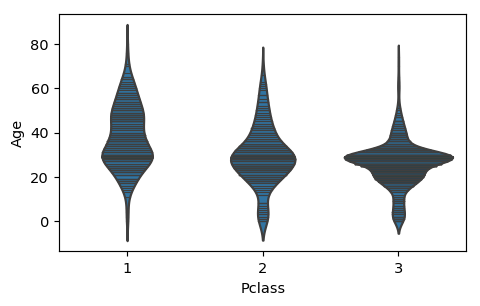

In [421]:
#Age Distribution based on Class
plt.figure(figsize=(5,3),dpi=105)
base_color=sb.color_palette()[0]
ax=sb.violinplot(data=df,x='Pclass',y='Age',inner='stick',color=base_color)

From violin plot we can say that -
- In first class most of the age group was between 10 to 65 i.e mixed age group. which includes teenagers and younsters and old ones peoples.
- In second class there was mostly from 15 to 40 approx i.e teen agers and youngsters
- In 3rd class there was mostly passengers of age group 20 to 40 i.e youngsters


Q)Which class Passenger survived the most?

#### For First Class(Higher Class):

In [443]:
#Percentage of Upper Class Survived
df[df['Pclass']==1]['Survived'].value_counts() *100/ len(df[df['Pclass']==1])

1    57.585139
0    42.414861
Name: Survived, dtype: float64

In [429]:
len(df[df['Pclass']==1]);df[df['Pclass']==1]['Survived'].value_counts()

1    186
0    137
Name: Survived, dtype: int64

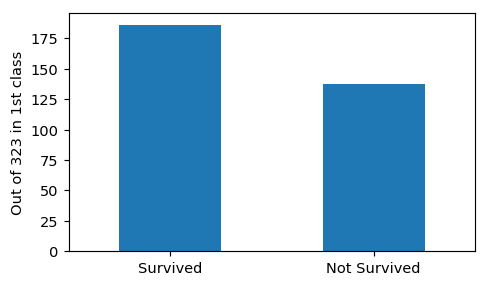

In [436]:
plt.figure(figsize=(5,3),dpi=105)
base_color=sb.color_palette()[0]
ax=df[df['Pclass']==1]['Survived'].value_counts().plot(kind='bar',color=base_color)
plt.ylabel('Out of 323 in 1st class');
ax.set(xticklabels=['Survived','Not Survived']);
plt.xticks(rotation=360);

- It is visible from the bar chart that in First class Most of the passenger survived.
- 57.58% of the First Class Passenger Survived and 42.41% of the First Class did not Survived.
- Moving on to numbers out of 323, 186 Survived and 137 did not survived.

#### For second class(Medium Class):

In [311]:
#Percentage of Medium Class Survived
df[df['Pclass']==2]['Survived'].value_counts() * 100 / len(df[df['Pclass']==2])

0    57.761733
1    42.238267
Name: Survived, dtype: float64

In [432]:
df[df['Pclass']==2]['Survived'].value_counts(),len(df[df['Pclass']==2])

(0    160
 1    117
 Name: Survived, dtype: int64, 277)

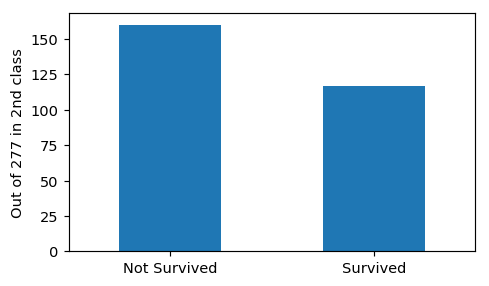

In [437]:
plt.figure(figsize=(5,3),dpi=105)
base_color=sb.color_palette()[0]
ax=df[df['Pclass']== 2 ]['Survived'].value_counts().plot(kind='bar',color=base_color)
plt.ylabel('Out of 277 in 2nd class');
ax.set(xticklabels=['Not Survived','Survived']);
plt.xticks(rotation=360);

- The bar chart aboved shows that the in Second class less people Survived and most of the passengers were dead.
- 42.23% of Second class Passengers survived whereas 57.76% were dead.
- About no's out of Total 277 Passengers 160 Passengers were dead and 160 people survived.

#### For third class (Lower Class)

In [310]:
df[df['Pclass']==3]['Survived'].value_counts() * 100  / len(df[df['Pclass']==3])

0    73.060649
1    26.939351
Name: Survived, dtype: float64

In [441]:
df[df['Pclass']==3]['Survived'].value_counts() ,  len(df[df['Pclass']==3]) 

(0    518
 1    191
 Name: Survived, dtype: int64, 709)

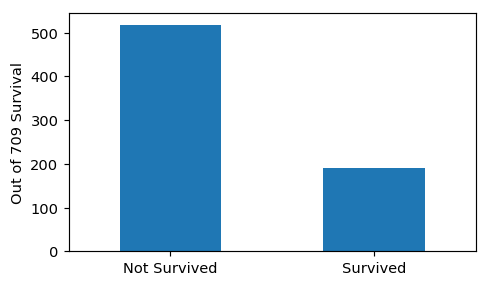

In [442]:
plt.figure(figsize=(5,3),dpi=105)
base_color=sb.color_palette()[0]
ax=df[df['Pclass']== 3 ]['Survived'].value_counts().plot(kind='bar',color=base_color)
ax.set(xticklabels=['Not Survived','Survived']);
plt.xticks(rotation=360);
plt.ylabel('Out of 709 Survival');

- From above bar chart it is clear that in Third Class very less passengers survived and mored passengers were dead.
- 73.07% of the Passengers in Third Class did not Survived and 26% Passengers Survived.
- Out of 709 Passengers 518 Passengers were dead and 191 Passengers were survived.

Comparing Percentage of Survived:
- First Class: 57.58% 
- Second Class:42.23% 
- Third Class:26.93% 
### Most of the Passengers from Upper class Survived and very less Passengers of third class Survived

Comparing Percentage of Dead:
- First Class: 42.23%
- Second Class:57.76%
- Third Class:73.06%
### Most of the Passengers from Lower class were dead and very less Passengers of Upper class was dead.

### Which family releation was more on ship?

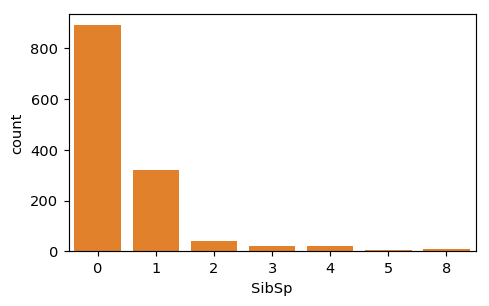

In [444]:
plt.figure(figsize=(5,3),dpi=105)
base_color=sb.color_palette()[1]
sb.countplot(data=df,x='SibSp',color=base_color);

From barchart it is clear that Brother and Sisters were more and Husband Wife was less.

### Now diving more deeper in Survival :



#### Survival of Mens

In [323]:
#Percentage of Men Survived
df[df['Sex']=='male']['Survived'].value_counts() * 100  / len(df[df['Sex']=='male'])

0    87.069988
1    12.930012
Name: Survived, dtype: float64

In [447]:
df[df['Sex']=='male']['Survived'].value_counts(),len(df[df['Sex']=='male'])

(0    734
 1    109
 Name: Survived, dtype: int64, 843)

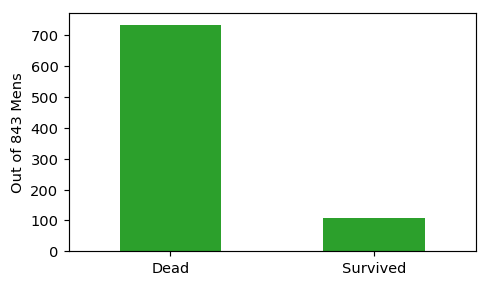

In [472]:
plt.figure(figsize=(5,3),dpi=105)
base_color=sb.color_palette()[2]
ax=df[df['Sex']=='male']['Survived'].value_counts().plot(kind='bar',color=base_color)
ax.set(xticklabels=['Dead','Survived']);
plt.xticks(rotation=360);
plt.ylabel('Out of 843 Mens');

- From above Bar chart it is clear that very less men Survived.
- Talking more specifically : Only 12.93 Percentage of Male Survived and 87.06 Percentage of Male did not Survived.
- In no's only 109 Mens Survived out of 843 mens. Rest 734 Mens were dead.

#### Survival of Women's

In [448]:
#percentage of Survival of Women's
df[df['Sex']=='female']['Survived'].value_counts() * 100  /len(df[df['Sex']=='female'])

1    82.618026
0    17.381974
Name: Survived, dtype: float64

In [449]:
df[df['Sex']=='female']['Survived'].value_counts(),len(df[df['Sex']=='female'])

(1    385
 0     81
 Name: Survived, dtype: int64, 466)

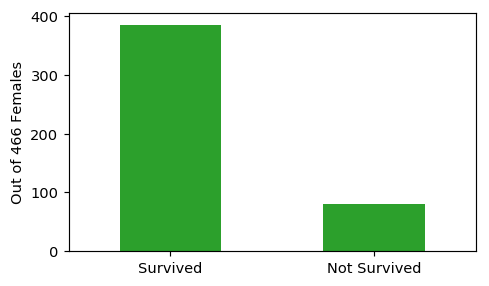

In [473]:
plt.figure(figsize=(5,3),dpi=105)
ax=df[df['Sex']=='female']['Survived'].value_counts().plot(kind='bar',color=base_color)
ax.set(xticklabels=['Survived','Not Survived']);
plt.xticks(rotation=360);
plt.ylabel('Out of 466 Females');

- From above bar it is clear that there were more no. of females who survived.
- Talking about womens ,82.61% of Females Survived and 17.38 % of females did not survived.
- More specifically,talking in no's 385 out of 466 females Survived and 81 females did not survived.

Most intresting fact: Females Survived more then the males.

## Now diving more deeper in Survival : 

q)How many males survived in First Class,Second class,Third class?


In [337]:
#Survived Percentage of Males which were in first class 
df[(df['Sex'] == 'male') & (df['Pclass'] == 1 )]['Survived'].value_counts() * 100 / len(df[(df['Sex'] == 'male') & (df['Pclass'] == 1 )])

0    74.860335
1    25.139665
Name: Survived, dtype: float64

In [453]:
df[(df['Sex'] == 'male') & (df['Pclass'] == 1 )]['Survived'].value_counts(), len(df[(df['Sex'] == 'male') & (df['Pclass'] == 1 )])

(0    134
 1     45
 Name: Survived, dtype: int64, 179)

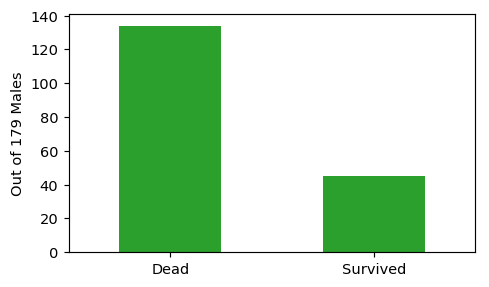

In [474]:
plt.figure(figsize=(5,3),dpi=105)
ax=df[(df['Sex'] == 'male') & (df['Pclass'] == 1 )]['Survived'].value_counts().plot(kind='bar',color=base_color);
ax.set(xticklabels=['Dead','Survived']);
plt.xticks(rotation=360);
plt.ylabel('Out of 179 Males');

- From above bar it is clear that most of the Mens do no survived in upper class.
- Talking about mens in the Upper Class ,Only 25.13% of Males in the upper class Survived and 74.86 % of males did not survived.
- More specifically,talking in no's 45 out of 179 males in upper class Survived and 134 males did not survived.

In [351]:
#Survived Percentage of Males which were in second class.
df[(df['Sex'] == 'male') & (df['Pclass'] == 2 )]['Survived'].value_counts() * 100 / len(df[(df['Sex'] == 'male') & (df['Pclass'] == 2 )])

0    90.05848
1     9.94152
Name: Survived, dtype: float64

In [456]:
df[(df['Sex'] == 'male') & (df['Pclass'] == 2 )]['Survived'].value_counts(), len(df[(df['Sex'] == 'male') & (df['Pclass'] == 2 )])

(0    154
 1     17
 Name: Survived, dtype: int64, 171)

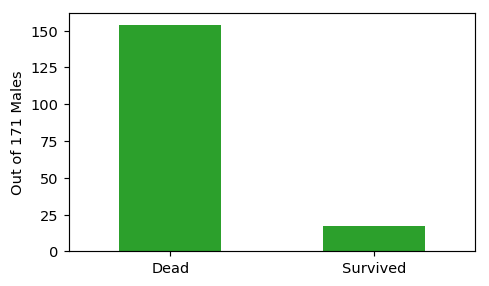

In [475]:
plt.figure(figsize=(5,3),dpi=105)
ax=df[(df['Sex'] == 'male') & (df['Pclass'] == 2 )]['Survived'].value_counts().plot(kind='bar',color=base_color);
ax.set(xticklabels=['Dead','Survived']);
plt.xticks(rotation=360);
plt.ylabel('Out of 171 Males');

- From above bar it is clear that most of the Mens do no survived in second class.
- Talking about mens in the Medium Class ,Only 9.94% of Males in the Medium class Survived and 90.05 % of males did not survived.
- More specifically,talking in no's, 17 out of 171 males in Medium class Survived and 154 males did not survived.

In [372]:
#Survived Percentage of Males which were in Third class
df[(df['Sex'] == 'male') & (df['Pclass'] == 3 )]['Survived'].value_counts() * 100 / len(df[(df['Sex'] == 'male') & (df['Pclass'] == 3 )])

0    90.466531
1     9.533469
Name: Survived, dtype: float64

In [459]:
df[(df['Sex'] == 'male') & (df['Pclass'] == 3 )]['Survived'].value_counts(), len(df[(df['Sex'] == 'male') & (df['Pclass'] == 3 )])

(0    446
 1     47
 Name: Survived, dtype: int64, 493)

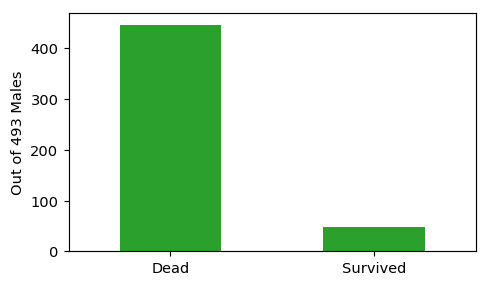

In [476]:
plt.figure(figsize=(5,3),dpi=105)
ax=df[(df['Sex'] == 'male') & (df['Pclass'] == 3 )]['Survived'].value_counts().plot(kind='bar',color=base_color);
ax.set(xticklabels=['Dead','Survived']);
plt.xticks(rotation=360);
plt.ylabel('Out of 493 Males');

- From above bar it is clear that very less Mens survived in lower class.
- Talking about mens in the Lower Class ,Only 9.53% of Males in the Medium class Survived and 90.46 % of males did not survived.
- More specifically,talking in no's, 47 out of 493 males in Lower class Survived and 446 males did not survived.

Conclusion:
Males in the first class survived the most

In [388]:
#Survived Percentage of Females which were in first class 
df[(df['Sex'] == 'female') & (df['Pclass'] == 1 )]['Survived'].value_counts() * 100 / len(df[(df['Sex'] == 'female') & (df['Pclass'] == 1 )])

1    97.916667
0     2.083333
Name: Survived, dtype: float64

In [463]:
df[(df['Sex'] == 'female') & (df['Pclass'] == 1 )]['Survived'].value_counts(),  len(df[(df['Sex'] == 'female') & (df['Pclass'] == 1 )])

(1    141
 0      3
 Name: Survived, dtype: int64, 144)

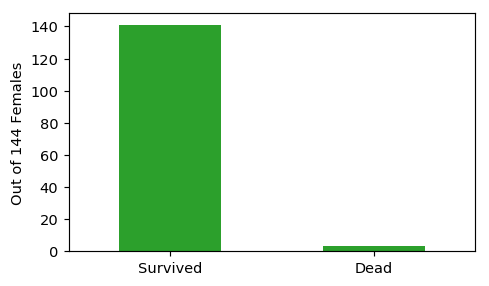

In [477]:
plt.figure(figsize=(5,3),dpi=105)
ax=df[(df['Sex'] == 'female') & (df['Pclass'] == 1 )]['Survived'].value_counts().plot(kind='bar',color=base_color);
ax.set(xticklabels=['Survived','Dead']);
plt.xticks(rotation=360);
plt.ylabel('Out of 144 Females');

- From above bar it is clear that very less Females were dead in Upper class.Most of the females survived in upper class
- Talking about Females in the Upper Class ,97.91% of Females in the Upper class Survived and 2.08 % of females did not survived.
- More specifically,talking in no's, 141 out of 144 females in Upper class Survived and 3 females did not survived.

In [377]:
#Survived Percentage of Females which were in second class 
df[(df['Sex'] == 'female') & (df['Pclass'] ==2 )]['Survived'].value_counts() * 100 / len(df[(df['Sex'] == 'female') & (df['Pclass'] == 2 )])

1    94.339623
0     5.660377
Name: Survived, dtype: float64

In [464]:
df[(df['Sex'] == 'female') & (df['Pclass'] ==2 )]['Survived'].value_counts(),len(df[(df['Sex'] == 'female') & (df['Pclass'] == 2 )])

(1    100
 0      6
 Name: Survived, dtype: int64, 106)

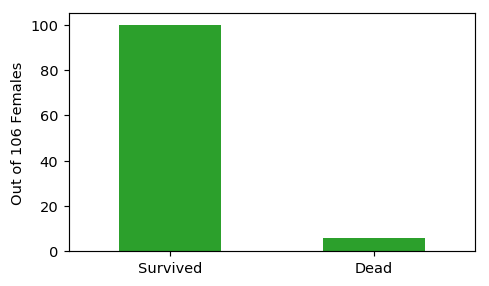

In [478]:
plt.figure(figsize=(5,3),dpi=105)
ax=df[(df['Sex'] == 'female') & (df['Pclass'] == 2 )]['Survived'].value_counts().plot(kind='bar',color=base_color);
ax.set(xticklabels=['Survived','Dead']);
plt.xticks(rotation=360);
plt.ylabel('Out of 106 Females');

- From above bar it is clear that very less Females were dead in Medium class.Most of the females survived in Medium class
- Talking about Females in the Medium Class ,94.33 % of Females in the Medium class Survived and 5.66 % of females did not survived.
- More specifically,talking in no's, 100 out of 106 females in Medium class Survived and 6 females did not survived.

In [394]:
#Survived Percentage of Females which were in Third class 
df[(df['Sex'] == 'female') & (df['Pclass'] == 3 )]['Survived'].value_counts() * 100 / len(df[(df['Sex'] == 'female') & (df['Pclass'] == 3 )])

1    66.666667
0    33.333333
Name: Survived, dtype: float64

In [469]:
df[(df['Sex'] == 'female') & (df['Pclass'] == 3 )]['Survived'].value_counts(),  len(df[(df['Sex'] == 'female') & (df['Pclass'] == 3 )])

(1    144
 0     72
 Name: Survived, dtype: int64, 216)

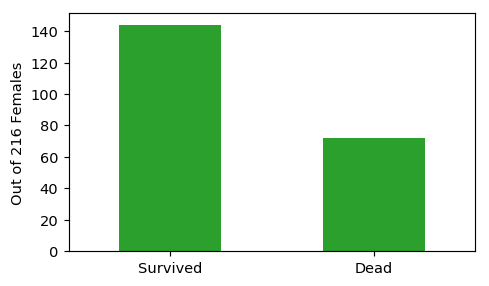

In [479]:
plt.figure(figsize=(5,3),dpi=105)
ax=df[(df['Sex'] == 'female') & (df['Pclass'] == 3 )]['Survived'].value_counts().plot(kind='bar',color=base_color);
ax.set(xticklabels=['Survived','Dead']);
plt.xticks(rotation=360);
plt.ylabel('Out of 216 Females');

- From above bar it is clear that less Females were dead in Lower class.Most of the females survived in Lower class
- Talking about Females in the Lower Class ,66.66 % of Females in the Lower class Survived and 33.33 % of females did not survived.
- More specifically,talking in no's, 144 out of 216 females in Lower class Survived and 72 females did not survived.

Conclusion:
Analysis shows that Females from the Upper class survived the most and females from Lower Class Survived less.